# Import Necessary Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from datetime import timedelta

# Load Dataset

At this time, reading data and search is any defects in it.

In [2]:
df = pd.read_csv("/kaggle/input/e-commerce-clickstream-and-transaction-dataset/ecommerce_clickstream_transactions.csv")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74817 entries, 0 to 74816
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   UserID     74817 non-null  int64  
 1   SessionID  74817 non-null  int64  
 2   Timestamp  74817 non-null  object 
 3   EventType  74817 non-null  object 
 4   ProductID  32113 non-null  object 
 5   Amount     10682 non-null  float64
 6   Outcome    10682 non-null  object 
dtypes: float64(1), int64(2), object(4)
memory usage: 4.0+ MB


In [4]:
missing_values = df.isnull().sum()
missing_values

UserID           0
SessionID        0
Timestamp        0
EventType        0
ProductID    42704
Amount       64135
Outcome      64135
dtype: int64

In [5]:
duplicate = df.duplicated().sum()
duplicate

0

In [6]:
unique_values = df['EventType'].unique()
unique_values_count = len(unique_values)
print(f"Number of unique values: {unique_values_count}")
print("Unique values:", unique_values)

Number of unique values: 7
Unique values: ['page_view' 'product_view' 'add_to_cart' 'login' 'click' 'logout'
 'purchase']


In [7]:
unique_values_2 = df['ProductID'].unique()
unique_values_count_2 = len(unique_values_2)
print(f"Number of unique values: {unique_values_count_2}")
print("Unique values:", unique_values_2)

Number of unique values: 8748
Unique values: [nan 'prod_8199' 'prod_4112' ... 'prod_8100' 'prod_4989' 'prod_6787']


In [8]:
unique_values_3 = df['Outcome'].unique()
unique_values_count_3 = len(unique_values_3)
print(f"Number of unique values: {unique_values_count_3}")
print("Unique values:", unique_values_3)

Number of unique values: 2
Unique values: [nan 'purchase']


### Conclusion (Initial Analysis)

From the analysis of the dataset, the following observations and conclusions can be made:

1. **Missing Values**:
   - **ProductID**: There are 42,704 missing values out of 74,817 entries.
   - **Amount** and **Outcome**: Both columns have 64,135 missing values, indicating they are not recorded for many events.
   - These missing values could be due to certain events not requiring these fields. For example, `page_view`, `login`, `logout`, and `click` events do not involve specific products or transaction amounts.

2. **Data Completeness**:
   - The columns `UserID`, `SessionID`, `Timestamp`, and `EventType` have no missing values, indicating that these are always recorded.

3. **Duplicate Records**:
   - There are no duplicate records in the dataset, ensuring the uniqueness and reliability of the recorded data.

4. **Event Types**:
   - There are 7 unique event types: `page_view`, `product_view`, `add_to_cart`, `login`, `click`, `logout`, and `purchase`.
   - This variety of event types provides a comprehensive view of user interactions on the e-commerce platform.

5. **Product IDs**:
   - There are 8,748 unique product IDs in the dataset.
   - The presence of `NaN` values in `ProductID` aligns with event types that do not involve specific products.

Overall, the dataset is structured with critical user interaction data. However, the significant number of missing values in `ProductID`, `Amount`, and `Outcome` columns suggests that certain events do not capture product-specific or transaction-specific details. This should be taken into account in any subsequent analysis or modeling.

### Further Steps
- Investigate why certain events have missing `ProductID`, `Amount`, and `Outcome` values.
- Determine if imputing missing values or filtering out non-transactional events is necessary for specific analyses.
- Explore relationships between different event types and user behavior.

# Investigate The Missing Value

The analysis reveals a clear correlation between specific event types and the presence of `ProductID`, `Amount`, and `Outcome`. `ProductID` is consistently associated with `product_view`, `add_to_cart`, and `purchase` events, while it is absent in `page_view`, `login`, `click`, and `logout` events. Similarly, `Amount` and `Outcome` are exclusively present during `purchase` events, indicating their direct relevance to purchase transactions. These insights highlight that interactions involving products are more likely to have associated product IDs, while financial details like amount and outcome are pertinent only to purchases. This understanding is crucial for further analysis and predictive modeling, as it delineates the contexts in which these fields are populated.

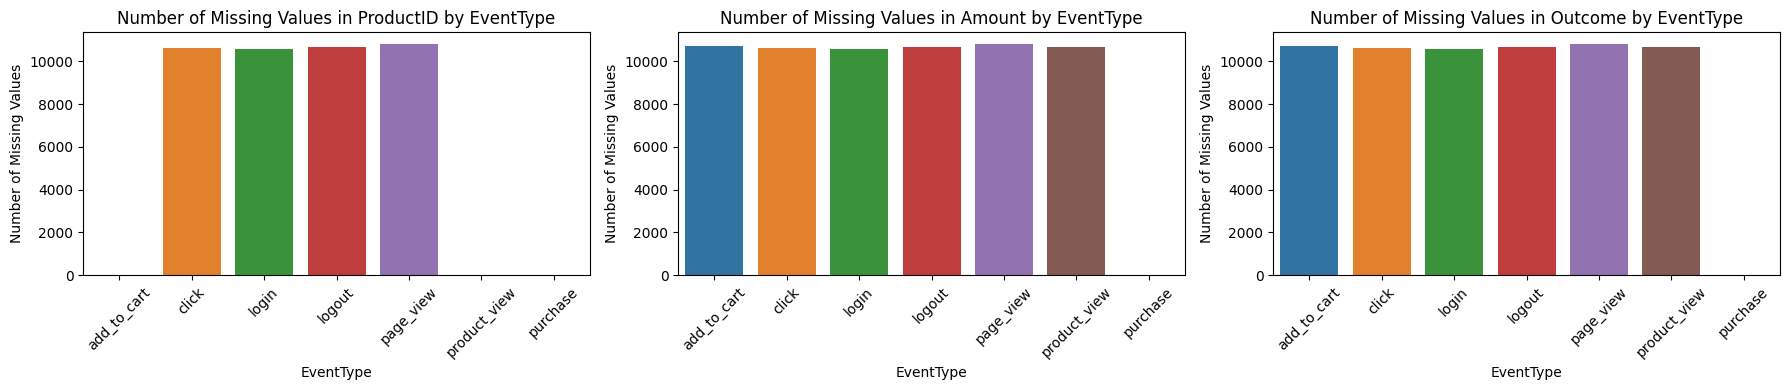

In [9]:
# Function to plot missing values for multiple columns
def plot_missing_by_event(columns):
    num_columns = len(columns)
    fig, axes = plt.subplots(1, num_columns, figsize=(6 * num_columns, 4))

    for i, column_name in enumerate(columns):
        # Calculate the number and percentage of missing values for the specified column by EventType
        missing_count = df.groupby('EventType')[column_name].apply(lambda x: x.isnull().sum()).reset_index(name='MissingCount')
        missing_percentage = df.groupby('EventType')[column_name].apply(lambda x: x.isnull().mean() * 100).reset_index(name='MissingPercentage')

        # Plot the number of missing values by EventType
        sns.barplot(x='EventType', y='MissingCount', data=missing_count, ax=axes[i])
        axes[i].set_title(f'Number of Missing Values in {column_name} by EventType')
        axes[i].set_ylabel('Number of Missing Values')
        axes[i].set_xlabel('EventType')
        axes[i].tick_params(axis='x', rotation=45)

    # Adjust layout
    plt.tight_layout()
    plt.show()

# Example usage
columns_to_plot = ['ProductID', 'Amount', 'Outcome']
plot_missing_by_event(columns_to_plot)

### Summary (Investigation of Missing Value)

**1. ProductID:**
   - Missing values are present in the `ProductID` column for the following event types: `login`, `click`, `logout`, and `page_view`.
   - **Conclusion:** These event types do not involve specific products, which explains the absence of `ProductID`.

**2. Amount:**
   - Missing values are present in the `Amount` column for all event types except `purchase`.
   - **Conclusion:** Only purchase events involve monetary transactions, hence the `Amount` field is populated exclusively for these events.

**3. Outcome:**
   - Similar to `Amount`, the `Outcome` column has missing values for all event types except `purchase`.
   - **Conclusion:** The `Outcome` field is only relevant for purchase events, where the outcome of the transaction (e.g., purchase completion status) is recorded.
   
#### Next Step
The missing data is having part in overall `ProductID`, `Amount` & `Outcome` data distribution, absolutely **cannot be filled or erased** to keep our analysis having less bias. Now we need to investigate the corelation between `UserID`, `SessionID` & `Timestamp` to the purchase event, and maybe we could find the purchase patterns based on time and the event.

# Exploring Correlations
We know all the data corelated even for the mising or `NaN` value, i think we might find a strong reason for that missing value by looking the `Timestamp` and the event.

In [10]:
# Load the dataset
df_2 = pd.read_csv("/kaggle/input/e-commerce-clickstream-and-transaction-dataset/ecommerce_clickstream_transactions.csv")

# Convert the Timestamp column to datetime format for accurate sorting
df_2['Timestamp'] = pd.to_datetime(df_2['Timestamp'])

I think the timestamp here act more in terms of time series event, it might be insightful if we sort it per user.

*Disclaimer: I cannot conclude the `SessionID` to anything rather than recording session, because the recording was performed in different days in just 1 session. For now i will ignore the `SessionID` because of the clarity problem.*

In [11]:
# Sort the dataframe by UserID, SessionID, and Timestamp (descending order)
df_ts2 = df_2.sort_values(by=['UserID', 'Timestamp'], ascending=[True, True])

# Reset the index for the sorted dataframe
df_ts2 = df_ts2.reset_index(drop=True)
df_ts2.head(20)

,UserID,SessionID,Timestamp,EventType,ProductID,Amount,Outcome
0,1,1,2024-01-01 23:09:51.956825,page_view,NaN,NaN,NaN
1,1,4,2024-01-02 00:15:51.420238,add_to_cart,prod_6144,NaN,NaN
2,1,5,2024-01-03 23:51:05.729189,logout,NaN,NaN,NaN
3,1,4,2024-01-04 09:25:49.705624,add_to_cart,prod_1102,NaN,NaN
4,1,8,2024-01-04 17:09:29.677060,click,NaN,NaN,NaN
5,1,9,2024-01-06 04:33:39.275154,page_view,NaN,NaN,NaN
6,1,8,2024-01-13 19:09:28.166082,product_view,prod_9816,NaN,NaN
7,1,7,2024-01-17 08:27:34.705063,add_to_cart,prod_5915,NaN,NaN
8,1,3,2024-01-19 15:04:33.065650,page_view,NaN,NaN,NaN
9,1,5,2024-01-19 16:51:29.413903,purchase,prod_6690,149.270047,purchase


#### Quick Conclusion
We can see each purchase require user to see product and doing some event first, i'll keep that in mind for future feature engineering

Since i ignore the `SessionID`, i need make sure that the `SessionID` do not alter the user purchase by watching it's distribution. If there any intense dynamic, it should have impact on the purchase, and if it's not, it will be safe to ignore the `SessionID`.

In [12]:
# Filter the dataframe to include only purchase events
df_purchases = df_ts2[df_ts2['EventType'] == 'purchase']

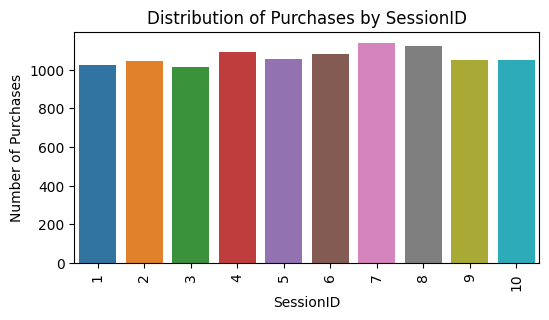

In [13]:
# Count the number of purchases by SessionID
purchase_counts_by_session = df_purchases['SessionID'].value_counts().reset_index()
purchase_counts_by_session.columns = ['SessionID', 'PurchaseCount']

# Plot the distribution of purchases by SessionID
plt.figure(figsize=(6, 3))
sns.barplot(x='SessionID', y='PurchaseCount', data=purchase_counts_by_session)
plt.title('Distribution of Purchases by SessionID')
plt.ylabel('Number of Purchases')
plt.xlabel('SessionID')
plt.xticks(rotation=90)
plt.show()

I also need to see the distribution of purchased product per user to see any trends or dynamic per user

In [14]:
# Count the number of purchases by UserID
purchase_counts = df_purchases['UserID'].value_counts().reset_index()
purchase_counts.columns = ['UserID', 'PurchaseCount']

# Create an interactive bar plot
fig = px.bar(purchase_counts, x='UserID', y='PurchaseCount', title='Distribution of Purchased Products by UserID')
fig.update_layout(xaxis_title='UserID', yaxis_title='Number of Purchases', xaxis=dict(tickangle=80))
fig.show()

In [15]:
# Identify the user with the most purchases
most_purchases = purchase_counts.iloc[0]
most_purchases

UserID           510
PurchaseCount     22
Name: 0, dtype: int64

In [16]:
# Identify the user with the least purchases
least_purchases = purchase_counts.iloc[-1]
least_purchases

UserID           425
PurchaseCount      3
Name: 999, dtype: int64

## Conclusion and Insights (Exploring Correlations)

Exploring the correlations within our dataset, particularly focusing on missing values (NaNs), can reveal underlying patterns. By examining timestamps and events, we can potentially identify reasons for these missing values. Timestamps are treated as indicators of time series events, and sorting by user can provide more insights.

Sorting the dataset by `UserID` and `Timestamp` reveals that users generally perform various events before making a purchase. This pattern is useful for future feature engineering and understanding user behavior.

To determine if the `SessionID` affects purchase behavior, we need to analyze its distribution. If the SessionID does not significantly impact purchase trends, it can be safely excluded from further analysis.

Analyzing the distribution of purchased products per user shows that most purchases are concentrated among a few users. This indicates the presence of high-value customers, which could be crucial for targeted marketing strategies (clustering) and improving customer engagement (recomendations).

### Key Findings

- **User Interaction Patterns**: Users engage with products through multiple events before making a purchase.
- **SessionID Analysis**: Ignoring SessionID does not appear to significantly impact the analysis of purchase behavior.
- **Purchase Distribution**: A small number of users account for the majority of purchases, highlighting potential high-value customers.

Understanding these patterns will help refine feature engineering approaches and enhance predictive models for user behavior in e-commerce platforms.

### Add-ons Explorations
By looking the trends it might gave us insight for future engineering process

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



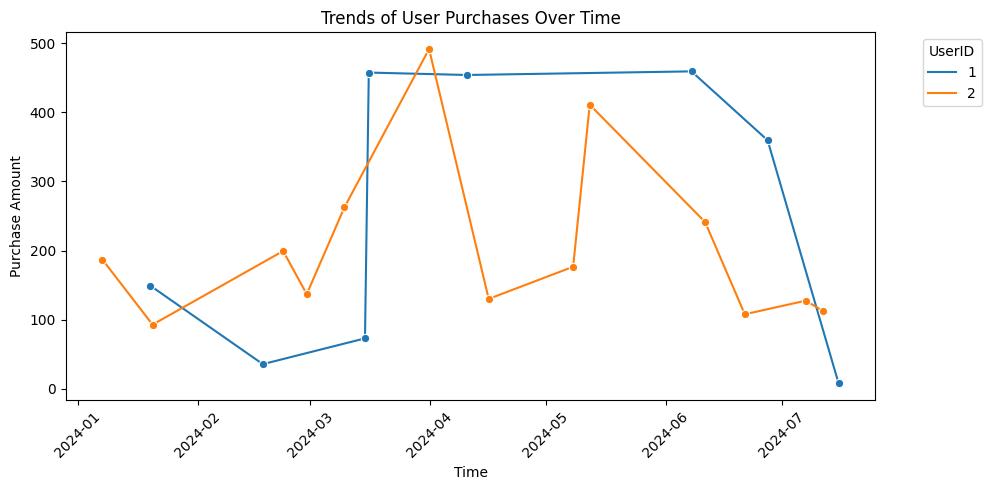

In [17]:
df_purchases2 = df_ts2

# Select only the first 4 unique users for the plot
unique_users = df_purchases2['UserID'].unique()[:2]
filtered_purchase_df = df_purchases2[df_purchases2['UserID'].isin(unique_users)]

# Plotting the purchase amount over time for each user
plt.figure(figsize=(10, 5))

# Use seaborn's lineplot for better handling of datetime on x-axis
sns.lineplot(data=filtered_purchase_df, x='Timestamp', y='Amount', hue='UserID', palette='tab10', marker='o')

plt.title('Trends of User Purchases Over Time')
plt.xlabel('Time')
plt.ylabel('Purchase Amount')
plt.legend(title='UserID', bbox_to_anchor=(1.05, 1), loc='upper left')

# Improve date formatting
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

The data in frame of time serries was a lot messier than i tought, it still can be used, only this time machine learning can help me to understand it in next steps (another notebook)